# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/home/harajlim/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


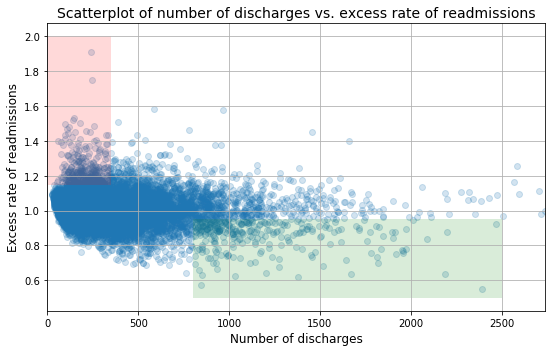

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [5]:
# Your turn
clean_hospital_read_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11578 entries, 16857 to 13666
Data columns (total 12 columns):
Hospital Name                 11578 non-null object
Provider Number               11578 non-null int64
State                         11578 non-null object
Measure Name                  11578 non-null object
Number of Discharges          11578 non-null int64
Footnote                      81 non-null float64
Excess Readmission Ratio      11497 non-null float64
Predicted Readmission Rate    11497 non-null float64
Expected Readmission Rate     11497 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    11578 non-null object
End Date                      11578 non-null object
dtypes: float64(5), int64(2), object(5)
memory usage: 1.1+ MB


# We begin by examining truthfulness of the the statements under points A and B:

**A. Overall, rate of readmissions is trending down with increasing number of discharges:**

The statement is not really apparent from scatterplot. A more rigorous analysis is needed.

To do so we begin by fitting a line to the data. We also build a 99% confidence interval for the slope of the line using bootstrapping.

In [6]:
slope, intercept=np.polyfit(x,y,deg=1)

print('The line fitting the data has a slope of: '+
     str(slope)+' and an intercept of: '+
     str(intercept))
                                                                                                                                                                                                                                                                                                                                         


The line fitting the data has a slope of: -2.8565052943822905e-05 and an intercept of: 1.0179475579544215


The slope indicates that every additional 1000 discahrges, the readmission rate decreases by -slope*1000= 0.0285
which is around 3% of the expected number of readmissions.

99% confidence interval for slope is: [-3.74913974e-05 -1.95527243e-05]


/home/harajlim/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


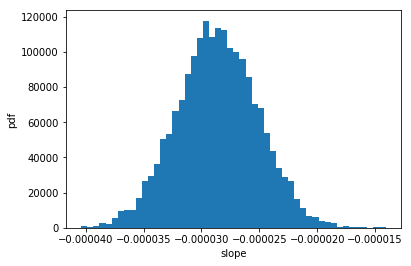

In [7]:
#to get a confidence interval for the slope:

bs_size=10000
slope=np.empty(bs_size)
index=np.arange(0,len(x))
x=np.array(x)
y=np.array(y)

for i in range(10000):
    
    chosen_index=np.random.choice(index,size=len(index))
    a,b=np.polyfit(x[chosen_index],y[chosen_index],deg=1)
    slope[i]=a

print('99% confidence interval for slope is: '+
      str(np.percentile(slope,[0.5,99.5])))
plt.hist(slope,bins=50,normed=True)
plt.xlabel('slope')
plt.ylabel('pdf')
plt.show()

With the above, we are 99% certain that the slope of the line fitting the data (line fitted using least squares error), is negative. So we agree with the statement. No information about the magnitude of the slope is discussed here (i.e. no practical significace is discussed).

**A.With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)**

For the coming two comments, the authors bring in the concept of inidence of a certain range of readmission rates. The figure they plot does not really show much, as the location of their recatangles are haphazard. 

With that I see no real meaning to their statement, however we investigate the probability of having an excessive readmission rate given a discharge rate.

With that we are interested in the function: 

G: R-->R  (R denotes the real line)
   x-->P(rate of readmissions>1|Discharge=x).  (P is the probability operator)
   
To get a better idea of how this function looks, we obtain a 95% confidence interval for every G(x) (using bootstrap methods).

With that, we get a region in the x-y space where we are 95% confident the tuples (x,G(x)) fall in.


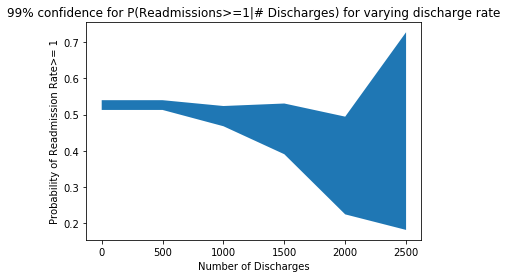

In [8]:
cutoff=1

step=500 #size of bin for discharge numbers. 
discharges=np.arange(0,2500,step=step) #setting up end points of bins
prob_L=np.zeros(len(discharges)) #lower bound probability empty array
prob_U=np.zeros(len(discharges)) #upper bound probability empty array

for i,d in enumerate(discharges):

    y_keep=[] #array of y's whose x lies in the bin of the iteration
    for j,xx in enumerate(x):
        if xx>=d and xx<d+step: #x belonging in bin condition

            y_keep.append(y[j])
    

    y_keep=np.array(y_keep) #change to np.array
    
    #start bootstrapping for discharge bin. using 10000 bootstramped samples here
    replicates=np.empty(10000) #array storing statistic for each bootstrapped sample
    for j in range(10000):
        y_bs=np.random.choice(y_keep,size=len(y_keep)) #generate bootstrapped sample
        replicates[j]=np.sum(y_bs>=cutoff)/len(y_bs) #generate statistic
    
    L,U=np.percentile(replicates,[0.5,99.5]) #obtain confidence inteval
    prob_L[i]=L
    prob_U[i]=U
    


plt.fill_between(np.concatenate((np.array([0]),discharges+step))\
                 ,np.concatenate((np.array([prob_L[0]]),prob_L))\
                 ,np.concatenate((np.array([prob_U[0]]),prob_U)))


plt.xlabel('Number of Discharges')
plt.ylabel('Probability of Readmission Rate>= 1')
plt.title('99% confidence for P(Readmissions>=1|# Discharges) for varying discharge rate')
plt.show()

**A.With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green)**

We do the same exercise as above but with P(Readmissions Rate<=1|Discharge=x)




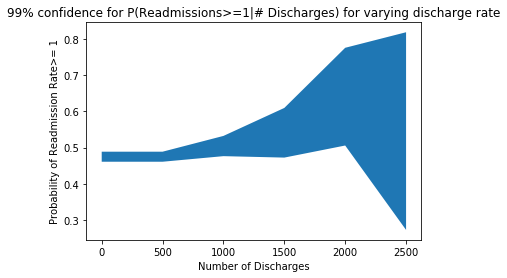

In [9]:
cutoff=1

step=500 #size of bin for discharge numbers. 
discharges=np.arange(0,2500,step=step) #setting up end points of bins
prob_L=np.zeros(len(discharges)) #lower bound probability empty array
prob_U=np.zeros(len(discharges)) #upper bound probability empty array

for i,d in enumerate(discharges):

    y_keep=[] #array of y's whose x lies in the bin of the iteration
    for j,xx in enumerate(x):
        if xx>=d and xx<d+step: #x belonging in bin condition

            y_keep.append(y[j])
    

    y_keep=np.array(y_keep) #change to np.array
    
    #start bootstrapping for discharge bin. using 10000 bootstramped samples here
    replicates=np.empty(10000) #array storing statistic for each bootstrapped sample
    for j in range(10000):
        y_bs=np.random.choice(y_keep,size=len(y_keep)) #generate bootstrapped sample
        replicates[j]=np.sum(y_bs<=cutoff)/len(y_bs) #generate statistic
    
    L,U=np.percentile(replicates,[0.5,99.5]) #obtain confidence inteval
    prob_L[i]=L
    prob_U[i]=U
    


plt.fill_between(np.concatenate((np.array([0]),discharges+step))\
                 ,np.concatenate((np.array([prob_L[0]]),prob_L))\
                 ,np.concatenate((np.array([prob_U[0]]),prob_U)))


plt.xlabel('Number of Discharges')
plt.ylabel('Probability of Readmission Rate>= 1')
plt.title('99% confidence for P(Readmissions>=1|# Discharges) for varying discharge rate')
plt.show()

Due to having smaller amount of samples for hospitals with larger discharge numbers, we see that the confidence intervals for both functions above get bigger with increasing discharge numbers.

For P(Readmissions>1|discharge number) we do see a general decrease with increasing discharge numbers, however we also get a very wide range of probabilities for discharge numbers greater than 1500. 

For P(Readmissions<1|discharge number) we do see a general increase with increasing discharge numbers, however we also get a very wide range of probabilities for discharge numbers greater than 1500.


**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 


A few comments about these two listed observations:

1- There seems no apparent reason for the choice of 100 and 1000 as cutoffs for comparison.

2- The statements make it sound like for hospitals with less than 100 discharges the TRUE readmissions rate is 1.023, and the true ratio of readmission rates greater than 1 is 63%. Rather, the authors should mention that these are estimates of the true values based one estimates obtained from samples. Moreover, they should be accompanied with an expected error (or confidence interval), for a certain confidence level (say 99%). The same applies for the statements regarding hospitals with discharge >1000

Despite these metrics not really having much practical value (i.e. theres not apparent reason why 100 and 1000 were chosen),(using bootstrapping) we give 99% confidence intervals for:

A- Mean readmission rate for hospitals with less than a 100 discharges.

B- Percentage of hospitals with readmissions rate >1 from hospitals with less than 100 discharges.

C- Mean readmission rate for hospitals with more than a 1000 discharges.

D- Percentage of hospitals with readmissions rate >1 from hospitals with more than 1000 discharges.

In [10]:
#we begin with obtaining the observed samples for readmission rates for hospitals with discharges 
#less than a hundred and those with discharges greater than 1000

y_100=[]
y_1000=[]


for i,xx in enumerate(x):
    if xx<=100:
        y_100.append(y[i])
    if xx>=1000:
        y_1000.append(y[i])
        
y_100=np.array(y_100)
y_1000=np.array(y_1000)

bs_size=10000

meanReadmission100=np.empty(bs_size) #mean readmissions rate for hospitals with discharges<100
pct100=np.empty(bs_size) #percentage of hospitals wih readmission rate>1 for hospitals with discharges <100
meanReadmission1000=np.empty(bs_size) #mean readmissions rate for hospitals with discharges>1000
pct1000=np.empty(bs_size) #percentage of hospitals wih readmission rate>1 for hospitals with discharges >1000

for i in range(bs_size):
    y_100_observed=np.random.choice(y_100,size=len(y_100))
    y_1000_observed=np.random.choice(y_1000,size=len(y_1000))
    
    meanReadmission100[i]=np.mean(y_100_observed)
    pct100[i]=100*np.sum(y_100_observed>1)/len(y_100_observed)
    meanReadmission1000[i]=np.mean(y_1000_observed)
    pct1000[i]=100*np.sum(y_1000_observed>1)/len(y_1000_observed)
    

print('99% CI for mean readmissions for hospitals with discharges<100: '+str(np.percentile(meanReadmission100,[0.5,99.5])))
print('99% CI for pct of readmissions>1 for hospitals with discharges<100: '+str(np.percentile(pct100,[0.5,99.5])))
print('99% CI for mean readmissions for hospitals with discharges<100: '+str(np.percentile(meanReadmission1000,[0.5,99.5])))
print('99% CI for pct of readmissions>1 for hospitals with discharges<100: '+str(np.percentile(pct1000,[0.5,99.5])))




99% CI for mean readmissions for hospitals with discharges<100: [1.01804006 1.02644739]
99% CI for pct of readmissions>1 for hospitals with discharges<100: [59.03515944 66.23058054]
99% CI for mean readmissions for hospitals with discharges<100: [0.96437226 0.99292345]
99% CI for pct of readmissions>1 for hospitals with discharges<100: [38.61171367 50.54229935]


**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

Up to this point no statistics show or prove the hypothesis that any correlation exists. We cannot accept this conclusion. Furthermore the idea that a significant correlation exists should be elaborated (after being proven): They should mention if they mean practically significant or statisically significant. It seems that they are implying practical significance with their second conclusion. 

Their second conclusion, on the other hand; is purely an opinion; and not a statement based on facts or any statistical method. I cannot prove it right thus.

Below we study the first conclusion by assuming the null hypothesis:

H0: discharge size and readmission rates are uncorrelated.

Ha: discharge size and readmission rates are negatively corellated.

we consider a signifcance level of 1%

We test the above hypothesis using bootstrapped samples.

In [11]:
#observed correlation coefficient:
ObservedCorr=np.corrcoef(x,y)[0,1]


bs_size=100000 #bootstrap number of samples
coeffReplicates=np.empty(bs_size) #coefficient of correlation of each bootstrapped sample

for i in range(bs_size): 
    y_observed=np.random.permutation(y) #permutating the y's to obtain no correlation with x.
    coeffReplicates[i]=np.corrcoef(x,y_observed)[0,1]

p=np.sum(coeffReplicates<=ObservedCorr)/len(coeffReplicates)

print('p_value: '+str(p))
print('observed correlation coeff= '+str(ObservedCorr))
    


p_value: 0.0
observed correlation coeff= -0.09309554287590442


we see a p value smaller than the significance level. The null hypothesis is thus rejected.

Statistical significance is worth mentioning here. Despite the hypothesis of no correlation being rejected
that does not mean that the variables are highly correlated. In fact since the sample size is large, the smallest correlation (one that may be seen as practically insignificant), would cause a rejection of the null hypothesis. The correlation coefficient here is -0.093 which is not in any way a large number when considering correlation coefficients (they can go up to 1 in absolute value). 

However, even a small correlation coefficient may be worth investigating if it yields any practical value. Here for example the matter at hand deals with lives, and an increase in hospital readmissions (despite a small increase) with decrease in discharge number might be worth investigating. This decision requires domain knowledge and exeprtise.


## Regarding the conclusions: 

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.


Regarding the first recommedation: The choice of 300 seems haphazard. Furthermore, none of the analysis above shows that upgraded resource allocation would decrease readmissions rates. For that, the recommendation is not based on any analysis shown above and is considered unjustified.

Regarding the second recommedation: While this does better at following the statistical analysis performed (we do see that higher discharge rates generally mean lower readmission rates), implications of the recommendations should be analysed. For example, remote locations with low population densities can end up having no hospitals under this recommendation. Even though hospitals might have better readmissions rates in general, certain people will not receive health care. 

Assuming the client has the capability, a possible recommendation would be the inspection of the hospitals whose excess readmission rates has a low probability of occuring (say 1%), and seeing what factors are causing this to happen.  


## Regarding the plot:

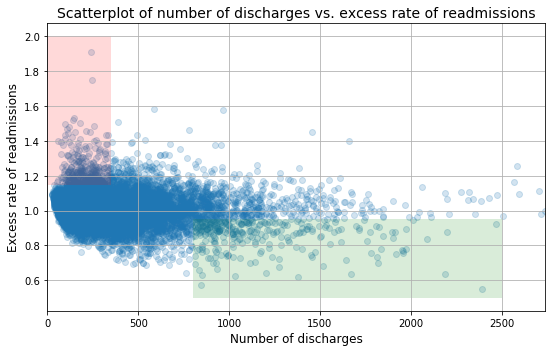

In [19]:
fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

The plot is good in showing all the data. The fills are not informative as they are randomly chosen (as discussed before). Furthermore, the plot is not great in showing correlation. A log scale could be used to do that, but would also be deceitful as it might falsely indicate significant correlation.

The plot shown below is what I believe most reflects the statistical analysis performed above:

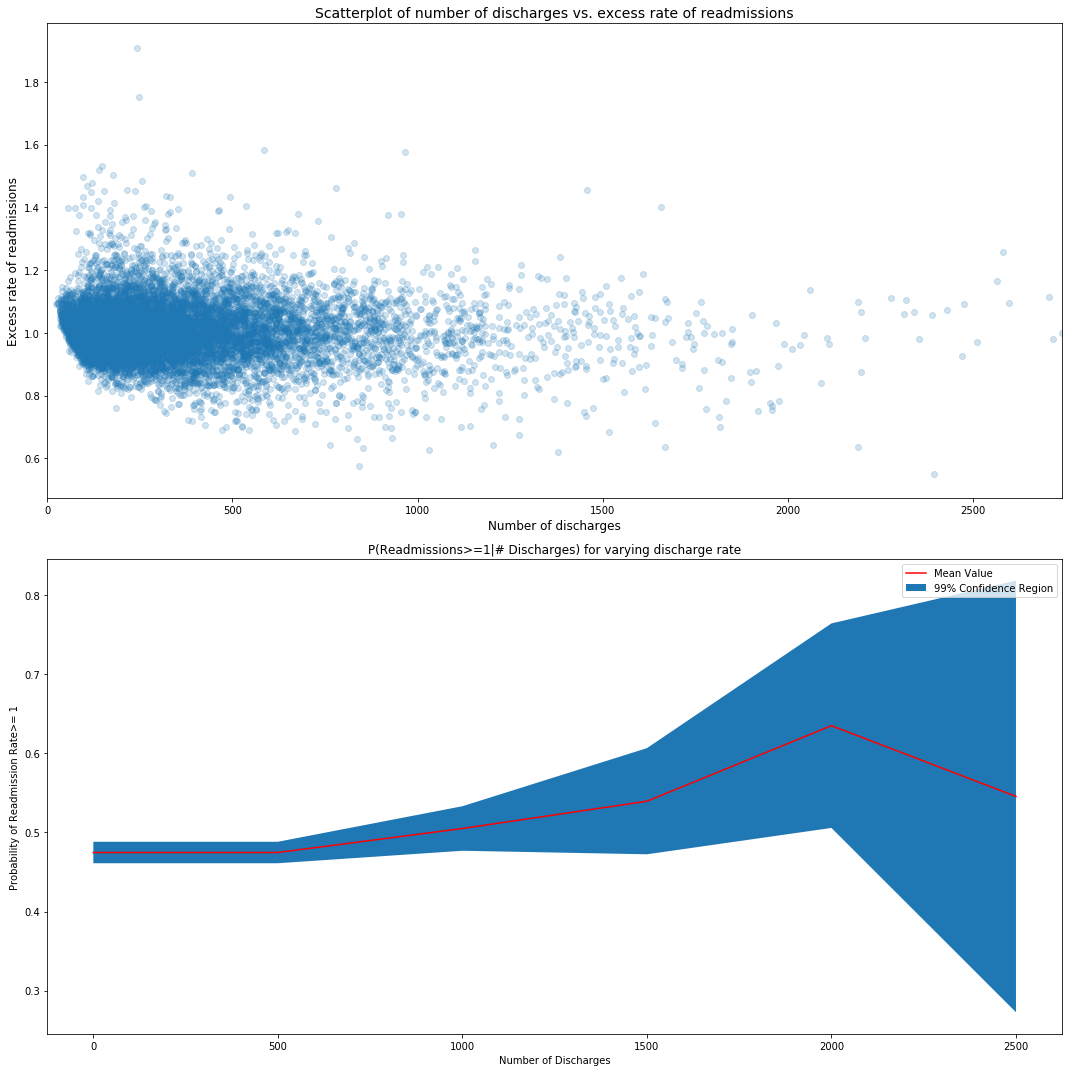

In [34]:

plt.subplots(2,2,figsize=(15,15))
plt.subplot(2,1,1)


plt.scatter(x, y,alpha=0.2)


plt.xlim([0, max(x)])
plt.xlabel('Number of discharges', fontsize=12)
plt.ylabel('Excess rate of readmissions', fontsize=12)
plt.title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

plt.subplot(2,1,2)


cutoff=1

step=500 #size of bin for discharge numbers. 
discharges=np.arange(0,2500,step=step) #setting up end points of bins
prob_L=np.zeros(len(discharges)) #lower bound probability empty array
prob_U=np.zeros(len(discharges)) #upper bound probability empty array

for i,d in enumerate(discharges):

    y_keep=[] #array of y's whose x lies in the bin of the iteration
    for j,xx in enumerate(x):
        if xx>=d and xx<d+step: #x belonging in bin condition

            y_keep.append(y[j])
    

    y_keep=np.array(y_keep) #change to np.array
    
    #start bootstrapping for discharge bin. using 10000 bootstramped samples here
    replicates=np.empty(10000) #array storing statistic for each bootstrapped sample
    for j in range(10000):
        y_bs=np.random.choice(y_keep,size=len(y_keep)) #generate bootstrapped sample
        replicates[j]=np.sum(y_bs<=cutoff)/len(y_bs) #generate statistic
    
    L,U=np.percentile(replicates,[0.5,99.5]) #obtain confidence inteval
    prob_L[i]=L
    prob_U[i]=U
    


plt.fill_between(np.concatenate((np.array([0]),discharges+step))\
                 ,np.concatenate((np.array([prob_L[0]]),prob_L))\
                 ,np.concatenate((np.array([prob_U[0]]),prob_U)))

plt.plot(np.concatenate((np.array([0]),discharges+step))\
         ,0.5*(np.concatenate((np.array([prob_L[0]]),prob_L))+np.concatenate((np.array([prob_U[0]]),prob_U))),color='red')

plt.xlabel('Number of Discharges')
plt.ylabel('Probability of Readmission Rate>= 1')
plt.title('P(Readmissions>=1|# Discharges) for varying discharge rate')
plt.legend(['Mean Value','99% Confidence Region'])
plt.tight_layout()
plt.show()
